In [7]:
#imporing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("jorex_origional.csv")
# plt.style.use('dark_background')

C:\Users\vivek\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


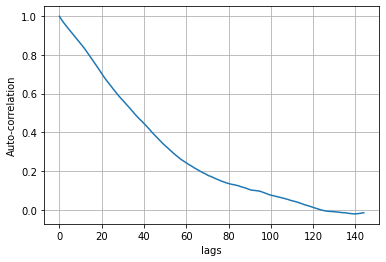

In [9]:
#AUTOCORRELATION
#Autocorrelation is simply the correlation of a series with its own lags.
# Plot lag on x axis and correlation on y axis
#Any correlation above confidence lnes are statistically significant.

from statsmodels.tsa.stattools import acf

acf_144 = acf(df["1_USD="], nlags=144)
plt.plot(acf_144)
plt.xlabel("lags")
plt.ylabel("Auto-correlation")
plt.grid()


In [4]:
df1=df.reset_index()['1_USD=']

In [5]:
df1

0      71.16500
1      71.34800
2      71.75350
3      71.76100
4      71.76100
         ...   
889    78.25250
890    78.44765
891    79.00335
892    78.92340
893    78.96205
Name: 1_USD=, Length: 894, dtype: float64

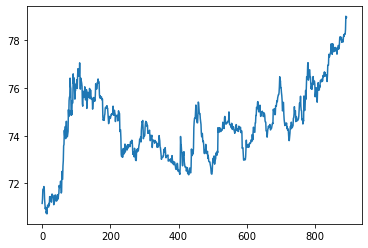

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Data Presprocessing

In [7]:
# as we have the time series dataset we have to know that 
# the given dataset is stationary or not?
# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(df1)
print("pvalue = ", pvalue, " if above 0.05, data is not stationary")


pvalue =  0.5662789937245847  if above 0.05, data is not stationary


### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.05315069]
 [0.07525654]
 [0.12423973]
 [0.12514571]
 [0.12514571]
 [0.13843338]
 [0.1336015 ]
 [0.07785368]
 [0.05170112]
 [0.02566937]
 [0.03213201]
 [0.03189041]
 [0.00338232]
 [0.01540162]
 [0.        ]
 [0.02966775]
 [0.04481569]
 [0.03849801]
 [0.03849801]
 [0.03472914]
 [0.05369427]
 [0.04548008]
 [0.0875416 ]
 [0.06982068]
 [0.07253861]
 [0.07253861]
 [0.08818182]
 [0.05955293]
 [0.07791408]
 [0.10056352]
 [0.09361769]
 [0.09349689]
 [0.09349689]
 [0.07549814]
 [0.04650685]
 [0.05601358]
 [0.05967373]
 [0.09265131]
 [0.09555044]
 [0.09555044]
 [0.06764633]
 [0.06571358]
 [0.07073873]
 [0.0664142 ]
 [0.09373849]
 [0.09686713]
 [0.09686713]
 [0.07555854]
 [0.09838917]
 [0.10412703]
 [0.14399005]
 [0.1337827 ]
 [0.14042653]
 [0.14042653]
 [0.16585431]
 [0.13258681]
 [0.10569739]
 [0.11113326]
 [0.21501869]
 [0.17515568]
 [0.17515568]
 [0.24219802]
 [0.26998134]
 [0.3442111 ]
 [0.35151932]
 [0.42278957]
 [0.39625046]
 [0.39625046]
 [0.44211709]
 [0.380873  ]
 [0.40587798]
 [0.46

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:

training_size,test_size

(581, 313)

In [12]:
train_data

array([[0.05315069],
       [0.07525654],
       [0.12423973],
       [0.12514571],
       [0.12514571],
       [0.13843338],
       [0.1336015 ],
       [0.07785368],
       [0.05170112],
       [0.02566937],
       [0.03213201],
       [0.03189041],
       [0.00338232],
       [0.01540162],
       [0.        ],
       [0.02966775],
       [0.04481569],
       [0.03849801],
       [0.03849801],
       [0.03472914],
       [0.05369427],
       [0.04548008],
       [0.0875416 ],
       [0.06982068],
       [0.07253861],
       [0.07253861],
       [0.08818182],
       [0.05955293],
       [0.07791408],
       [0.10056352],
       [0.09361769],
       [0.09349689],
       [0.09349689],
       [0.07549814],
       [0.04650685],
       [0.05601358],
       [0.05967373],
       [0.09265131],
       [0.09555044],
       [0.09555044],
       [0.06764633],
       [0.06571358],
       [0.07073873],
       [0.0664142 ],
       [0.09373849],
       [0.09686713],
       [0.09686713],
       [0.075

In [13]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(480, 100)
(480,)


(None, None)

In [16]:

print(X_test.shape), print(ytest.shape)

(212, 100)
(212,)


(None, None)

In [17]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [3]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\vivek\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 6s 274ms/step - loss: 0.0550 - val_loss: 0.0069
Epoch 2/100
8/8 [==============================] - 1s 136ms/step - loss: 0.0105 - val_loss: 0.0369
Epoch 3/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0071 - val_loss: 0.0091
Epoch 4/100
8/8 [==============================] - 1s 129ms/step - loss: 0.0055 - val_loss: 0.0272
Epoch 5/100
8/8 [==============================] - 1s 133ms/step - loss: 0.0049 - val_loss: 0.0098
Epoch 6/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0044 - val_loss: 0.0163
Epoch 7/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0040 - val_loss: 0.0081
Epoch 8/100
8/8 [==============================] - 1s 132ms/step - loss: 0.0038 - val_loss: 0.0100
Epoch 9/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0036 - val_loss: 0.0084
Epoch 10/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 11/

8/8 [==============================] - 1s 130ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 84/100
8/8 [==============================] - 1s 131ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 85/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 86/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 87/100
8/8 [==============================] - 1s 132ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 88/100
8/8 [==============================] - 1s 128ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 89/100
8/8 [==============================] - 1s 130ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 90/100
8/8 [==============================] - 1s 139ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 91/100
8/8 [==============================] - 1s 129ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 92/100
8/8 [==============================] - 1s 132ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 93/100


In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

73.80828807572465

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

75.45103230736865

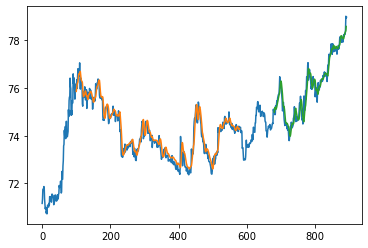

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label="input data")
plt.plot(trainPredictPlot,label="")
plt.plot(testPredictPlot)
plt.show()

## predicting for next 6 mounths

In [28]:
df2=pd.read_csv("test_forex.csv")

In [29]:
len(df2)

183

In [30]:
len(test_data)

313

In [31]:
x_input=test_data[213:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
temp_input

[0.6533185960970478,
 0.6948969299437682,
 0.6710999172540433,
 0.6690886468921953,
 0.6716918226458173,
 0.6716918226458173,
 0.6543574504581233,
 0.5925093768685787,
 0.6114141102997586,
 0.6263144225600517,
 0.6383035266689632,
 0.6366606872142402,
 0.5707296743916377,
 0.5651005333188373,
 0.6287001636799605,
 0.6283860914312651,
 0.6643232045033134,
 0.6272385197533339,
 0.6272385197533339,
 0.6265137376409555,
 0.6492235771621164,
 0.6411905754165996,
 0.6724770032675593,
 0.676976692215236,
 0.6772605652092505,
 0.6772605652092505,
 0.668212868506405,
 0.6825816738842878,
 0.6718246993664216,
 0.6728273146218751,
 0.7001395205566325,
 0.6946432562044365,
 0.6946432562044365,
 0.702531301527479,
 0.718367790682926,
 0.6958995451992251,
 0.7155049013390364,
 0.699831488158873,
 0.7004173536997111,
 0.7004173536997111,
 0.6999220859229194,
 0.7044761335290239,
 0.6697349109423989,
 0.7004717123581408,
 0.7522755138403188,
 0.752565426685269,
 0.752565426685269,
 0.8073468746791335,

In [34]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<len(df2)):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.98964083]
101
1 day input [0.69489693 0.67109992 0.66908865 0.67169182 0.67169182 0.65435745
 0.59250938 0.61141411 0.62631442 0.63830353 0.63666069 0.57072967
 0.56510053 0.62870016 0.62838609 0.6643232  0.62723852 0.62723852
 0.62651374 0.64922358 0.64119058 0.672477   0.67697669 0.67726057
 0.67726057 0.66821287 0.68258167 0.6718247  0.67282731 0.70013952
 0.69464326 0.69464326 0.7025313  0.71836779 0.69589955 0.7155049
 0.69983149 0.70041735 0.70041735 0.69992209 0.70447613 0.66973491
 0.70047171 0.75227551 0.75256543 0.75256543 0.80734687 0.79317738
 0.79486854 0.802213   0.8112909  0.81676904 0.81676904 0.86037677
 0.81821861 0.84521674 0.80746767 0.86101095 0.85688573 0.85688573
 0.82051375 0.82225323 0.82394439 0.83951512 0.83447185 0.84161699
 0.84161699 0.82323168 0.8339041  0.82723006 0.80818641 0.8402701
 0.83223106 0.83223106 0.85224109 0.83597577 0.83561338 0.85722396
 0.88881238 0.89613268 0.89613268 0.88947677 0.88064651 0.89297988
 0.86816213 0.88096058 0.87293966 0

10 day output [[1.0422419]]
11 day input [0.63666069 0.57072967 0.56510053 0.62870016 0.62838609 0.6643232
 0.62723852 0.62723852 0.62651374 0.64922358 0.64119058 0.672477
 0.67697669 0.67726057 0.67726057 0.66821287 0.68258167 0.6718247
 0.67282731 0.70013952 0.69464326 0.69464326 0.7025313  0.71836779
 0.69589955 0.7155049  0.69983149 0.70041735 0.70041735 0.69992209
 0.70447613 0.66973491 0.70047171 0.75227551 0.75256543 0.75256543
 0.80734687 0.79317738 0.79486854 0.802213   0.8112909  0.81676904
 0.81676904 0.86037677 0.81821861 0.84521674 0.80746767 0.86101095
 0.85688573 0.85688573 0.82051375 0.82225323 0.82394439 0.83951512
 0.83447185 0.84161699 0.84161699 0.82323168 0.8339041  0.82723006
 0.80818641 0.8402701  0.83223106 0.83223106 0.85224109 0.83597577
 0.83561338 0.85722396 0.88881238 0.89613268 0.89613268 0.88947677
 0.88064651 0.89297988 0.86816213 0.88096058 0.87293966 0.87293966
 0.87008281 0.89498511 0.90694402 0.89818623 0.90981295 0.90929956
 0.90929956 0.9328731  1.

20 day output [[1.1108699]]
21 day input [0.64119058 0.672477   0.67697669 0.67726057 0.67726057 0.66821287
 0.68258167 0.6718247  0.67282731 0.70013952 0.69464326 0.69464326
 0.7025313  0.71836779 0.69589955 0.7155049  0.69983149 0.70041735
 0.70041735 0.69992209 0.70447613 0.66973491 0.70047171 0.75227551
 0.75256543 0.75256543 0.80734687 0.79317738 0.79486854 0.802213
 0.8112909  0.81676904 0.81676904 0.86037677 0.81821861 0.84521674
 0.80746767 0.86101095 0.85688573 0.85688573 0.82051375 0.82225323
 0.82394439 0.83951512 0.83447185 0.84161699 0.84161699 0.82323168
 0.8339041  0.82723006 0.80818641 0.8402701  0.83223106 0.83223106
 0.85224109 0.83597577 0.83561338 0.85722396 0.88881238 0.89613268
 0.89613268 0.88947677 0.88064651 0.89297988 0.86816213 0.88096058
 0.87293966 0.87293966 0.87008281 0.89498511 0.90694402 0.89818623
 0.90981295 0.90929956 0.90929956 0.9328731  1.         0.99034228
 0.99501108 0.98964083 0.99925148 1.00423467 1.00776553 1.0113703
 1.01549017 1.02012134 1

30 day input [0.70013952 0.69464326 0.69464326 0.7025313  0.71836779 0.69589955
 0.7155049  0.69983149 0.70041735 0.70041735 0.69992209 0.70447613
 0.66973491 0.70047171 0.75227551 0.75256543 0.75256543 0.80734687
 0.79317738 0.79486854 0.802213   0.8112909  0.81676904 0.81676904
 0.86037677 0.81821861 0.84521674 0.80746767 0.86101095 0.85688573
 0.85688573 0.82051375 0.82225323 0.82394439 0.83951512 0.83447185
 0.84161699 0.84161699 0.82323168 0.8339041  0.82723006 0.80818641
 0.8402701  0.83223106 0.83223106 0.85224109 0.83597577 0.83561338
 0.85722396 0.88881238 0.89613268 0.89613268 0.88947677 0.88064651
 0.89297988 0.86816213 0.88096058 0.87293966 0.87293966 0.87008281
 0.89498511 0.90694402 0.89818623 0.90981295 0.90929956 0.90929956
 0.9328731  1.         0.99034228 0.99501108 0.98964083 0.99925148
 1.00423467 1.00776553 1.0113703  1.01549017 1.02012134 1.02516854
 1.03056264 1.0362637  1.04224193 1.04846644 1.05490267 1.06151569
 1.06827462 1.07515395 1.08213437 1.08920264 1.09

39 day output [[1.2631115]]
40 day input [0.69992209 0.70447613 0.66973491 0.70047171 0.75227551 0.75256543
 0.75256543 0.80734687 0.79317738 0.79486854 0.802213   0.8112909
 0.81676904 0.81676904 0.86037677 0.81821861 0.84521674 0.80746767
 0.86101095 0.85688573 0.85688573 0.82051375 0.82225323 0.82394439
 0.83951512 0.83447185 0.84161699 0.84161699 0.82323168 0.8339041
 0.82723006 0.80818641 0.8402701  0.83223106 0.83223106 0.85224109
 0.83597577 0.83561338 0.85722396 0.88881238 0.89613268 0.89613268
 0.88947677 0.88064651 0.89297988 0.86816213 0.88096058 0.87293966
 0.87293966 0.87008281 0.89498511 0.90694402 0.89818623 0.90981295
 0.90929956 0.90929956 0.9328731  1.         0.99034228 0.99501108
 0.98964083 0.99925148 1.00423467 1.00776553 1.0113703  1.01549017
 1.02012134 1.02516854 1.03056264 1.0362637  1.04224193 1.04846644
 1.05490267 1.06151569 1.06827462 1.07515395 1.08213437 1.08920264
 1.09635067 1.10357368 1.11086988 1.11823905 1.12568223 1.13320053
 1.14079499 1.14846671 

48 day output [[1.3407837]]
49 day input [0.79486854 0.802213   0.8112909  0.81676904 0.81676904 0.86037677
 0.81821861 0.84521674 0.80746767 0.86101095 0.85688573 0.85688573
 0.82051375 0.82225323 0.82394439 0.83951512 0.83447185 0.84161699
 0.84161699 0.82323168 0.8339041  0.82723006 0.80818641 0.8402701
 0.83223106 0.83223106 0.85224109 0.83597577 0.83561338 0.85722396
 0.88881238 0.89613268 0.89613268 0.88947677 0.88064651 0.89297988
 0.86816213 0.88096058 0.87293966 0.87293966 0.87008281 0.89498511
 0.90694402 0.89818623 0.90981295 0.90929956 0.90929956 0.9328731
 1.         0.99034228 0.99501108 0.98964083 0.99925148 1.00423467
 1.00776553 1.0113703  1.01549017 1.02012134 1.02516854 1.03056264
 1.0362637  1.04224193 1.04846644 1.05490267 1.06151569 1.06827462
 1.07515395 1.08213437 1.08920264 1.09635067 1.10357368 1.11086988
 1.11823905 1.12568223 1.13320053 1.14079499 1.14846671 1.15621603
 1.16404235 1.17194486 1.17992187 1.18797123 1.1960901  1.20427561
 1.21252382 1.22083187 

58 day output [[1.4252591]]
59 day input [0.85688573 0.85688573 0.82051375 0.82225323 0.82394439 0.83951512
 0.83447185 0.84161699 0.84161699 0.82323168 0.8339041  0.82723006
 0.80818641 0.8402701  0.83223106 0.83223106 0.85224109 0.83597577
 0.83561338 0.85722396 0.88881238 0.89613268 0.89613268 0.88947677
 0.88064651 0.89297988 0.86816213 0.88096058 0.87293966 0.87293966
 0.87008281 0.89498511 0.90694402 0.89818623 0.90981295 0.90929956
 0.90929956 0.9328731  1.         0.99034228 0.99501108 0.98964083
 0.99925148 1.00423467 1.00776553 1.0113703  1.01549017 1.02012134
 1.02516854 1.03056264 1.0362637  1.04224193 1.04846644 1.05490267
 1.06151569 1.06827462 1.07515395 1.08213437 1.08920264 1.09635067
 1.10357368 1.11086988 1.11823905 1.12568223 1.13320053 1.14079499
 1.14846671 1.15621603 1.16404235 1.17194486 1.17992187 1.18797123
 1.1960901  1.20427561 1.21252382 1.22083187 1.22919476 1.23760879
 1.24606943 1.2545718  1.26311147 1.27168334 1.2802825  1.28890336
 1.2975409  1.3061894

68 day output [[1.5025828]]
69 day input [0.8339041  0.82723006 0.80818641 0.8402701  0.83223106 0.83223106
 0.85224109 0.83597577 0.83561338 0.85722396 0.88881238 0.89613268
 0.89613268 0.88947677 0.88064651 0.89297988 0.86816213 0.88096058
 0.87293966 0.87293966 0.87008281 0.89498511 0.90694402 0.89818623
 0.90981295 0.90929956 0.90929956 0.9328731  1.         0.99034228
 0.99501108 0.98964083 0.99925148 1.00423467 1.00776553 1.0113703
 1.01549017 1.02012134 1.02516854 1.03056264 1.0362637  1.04224193
 1.04846644 1.05490267 1.06151569 1.06827462 1.07515395 1.08213437
 1.08920264 1.09635067 1.10357368 1.11086988 1.11823905 1.12568223
 1.13320053 1.14079499 1.14846671 1.15621603 1.16404235 1.17194486
 1.17992187 1.18797123 1.1960901  1.20427561 1.21252382 1.22083187
 1.22919476 1.23760879 1.24606943 1.2545718  1.26311147 1.27168334
 1.2802825  1.28890336 1.2975409  1.30618942 1.31484354 1.32349801
 1.33214664 1.34078372 1.3494035  1.3580004  1.36656857 1.37510204
 1.38359487 1.39204192

78 day output [[1.568856]]
79 day input [0.88881238 0.89613268 0.89613268 0.88947677 0.88064651 0.89297988
 0.86816213 0.88096058 0.87293966 0.87293966 0.87008281 0.89498511
 0.90694402 0.89818623 0.90981295 0.90929956 0.90929956 0.9328731
 1.         0.99034228 0.99501108 0.98964083 0.99925148 1.00423467
 1.00776553 1.0113703  1.01549017 1.02012134 1.02516854 1.03056264
 1.0362637  1.04224193 1.04846644 1.05490267 1.06151569 1.06827462
 1.07515395 1.08213437 1.08920264 1.09635067 1.10357368 1.11086988
 1.11823905 1.12568223 1.13320053 1.14079499 1.14846671 1.15621603
 1.16404235 1.17194486 1.17992187 1.18797123 1.1960901  1.20427561
 1.21252382 1.22083187 1.22919476 1.23760879 1.24606943 1.2545718
 1.26311147 1.27168334 1.2802825  1.28890336 1.2975409  1.30618942
 1.31484354 1.32349801 1.33214664 1.34078372 1.3494035  1.3580004
 1.36656857 1.37510204 1.38359487 1.39204192 1.40043724 1.40877569
 1.41705108 1.42525911 1.43339407 1.44145119 1.4494257  1.45731342
 1.46510959 1.47281003 1.

88 day output [[1.6224993]]
89 day input [0.87008281 0.89498511 0.90694402 0.89818623 0.90981295 0.90929956
 0.90929956 0.9328731  1.         0.99034228 0.99501108 0.98964083
 0.99925148 1.00423467 1.00776553 1.0113703  1.01549017 1.02012134
 1.02516854 1.03056264 1.0362637  1.04224193 1.04846644 1.05490267
 1.06151569 1.06827462 1.07515395 1.08213437 1.08920264 1.09635067
 1.10357368 1.11086988 1.11823905 1.12568223 1.13320053 1.14079499
 1.14846671 1.15621603 1.16404235 1.17194486 1.17992187 1.18797123
 1.1960901  1.20427561 1.21252382 1.22083187 1.22919476 1.23760879
 1.24606943 1.2545718  1.26311147 1.27168334 1.2802825  1.28890336
 1.2975409  1.30618942 1.31484354 1.32349801 1.33214664 1.34078372
 1.3494035  1.3580004  1.36656857 1.37510204 1.38359487 1.39204192
 1.40043724 1.40877569 1.41705108 1.42525911 1.43339407 1.44145119
 1.4494257  1.45731342 1.46510959 1.47281003 1.48041093 1.48790932
 1.49530065 1.50258279 1.50975192 1.51680613 1.52374291 1.53055966
 1.53725469 1.5438263

99 day output [[1.6675013]]
100 day input [0.98964083 0.99925148 1.00423467 1.00776553 1.0113703  1.01549017
 1.02012134 1.02516854 1.03056264 1.0362637  1.04224193 1.04846644
 1.05490267 1.06151569 1.06827462 1.07515395 1.08213437 1.08920264
 1.09635067 1.10357368 1.11086988 1.11823905 1.12568223 1.13320053
 1.14079499 1.14846671 1.15621603 1.16404235 1.17194486 1.17992187
 1.18797123 1.1960901  1.20427561 1.21252382 1.22083187 1.22919476
 1.23760879 1.24606943 1.2545718  1.26311147 1.27168334 1.2802825
 1.28890336 1.2975409  1.30618942 1.31484354 1.32349801 1.33214664
 1.34078372 1.3494035  1.3580004  1.36656857 1.37510204 1.38359487
 1.39204192 1.40043724 1.40877569 1.41705108 1.42525911 1.43339407
 1.44145119 1.4494257  1.45731342 1.46510959 1.47281003 1.48041093
 1.48790932 1.49530065 1.50258279 1.50975192 1.51680613 1.52374291
 1.53055966 1.53725469 1.54382634 1.55027318 1.55659485 1.56278896
 1.568856   1.57479441 1.58060503 1.58628714 1.59184051 1.59726655
 1.60256505 1.6077368

109 day output [[1.6975105]]
110 day input [1.04224193 1.04846644 1.05490267 1.06151569 1.06827462 1.07515395
 1.08213437 1.08920264 1.09635067 1.10357368 1.11086988 1.11823905
 1.12568223 1.13320053 1.14079499 1.14846671 1.15621603 1.16404235
 1.17194486 1.17992187 1.18797123 1.1960901  1.20427561 1.21252382
 1.22083187 1.22919476 1.23760879 1.24606943 1.2545718  1.26311147
 1.27168334 1.2802825  1.28890336 1.2975409  1.30618942 1.31484354
 1.32349801 1.33214664 1.34078372 1.3494035  1.3580004  1.36656857
 1.37510204 1.38359487 1.39204192 1.40043724 1.40877569 1.41705108
 1.42525911 1.43339407 1.44145119 1.4494257  1.45731342 1.46510959
 1.47281003 1.48041093 1.48790932 1.49530065 1.50258279 1.50975192
 1.51680613 1.52374291 1.53055966 1.53725469 1.54382634 1.55027318
 1.55659485 1.56278896 1.568856   1.57479441 1.58060503 1.58628714
 1.59184051 1.59726655 1.60256505 1.60773683 1.6127826  1.61770284
 1.62249935 1.62717295 1.63172543 1.63615823 1.64047182 1.64466906
 1.64875138 1.65272

119 day output [[1.719289]]
120 day input [1.11086988 1.11823905 1.12568223 1.13320053 1.14079499 1.14846671
 1.15621603 1.16404235 1.17194486 1.17992187 1.18797123 1.1960901
 1.20427561 1.21252382 1.22083187 1.22919476 1.23760879 1.24606943
 1.2545718  1.26311147 1.27168334 1.2802825  1.28890336 1.2975409
 1.30618942 1.31484354 1.32349801 1.33214664 1.34078372 1.3494035
 1.3580004  1.36656857 1.37510204 1.38359487 1.39204192 1.40043724
 1.40877569 1.41705108 1.42525911 1.43339407 1.44145119 1.4494257
 1.45731342 1.46510959 1.47281003 1.48041093 1.48790932 1.49530065
 1.50258279 1.50975192 1.51680613 1.52374291 1.53055966 1.53725469
 1.54382634 1.55027318 1.55659485 1.56278896 1.568856   1.57479441
 1.58060503 1.58628714 1.59184051 1.59726655 1.60256505 1.60773683
 1.6127826  1.61770284 1.62249935 1.62717295 1.63172543 1.63615823
 1.64047182 1.64466906 1.64875138 1.65272009 1.65657783 1.66032565
 1.66396618 1.66750133 1.67093289 1.67426312 1.67749405 1.68062806
 1.68366683 1.68661273 1

129 day output [[1.7348117]]
130 day input [1.18797123 1.1960901  1.20427561 1.21252382 1.22083187 1.22919476
 1.23760879 1.24606943 1.2545718  1.26311147 1.27168334 1.2802825
 1.28890336 1.2975409  1.30618942 1.31484354 1.32349801 1.33214664
 1.34078372 1.3494035  1.3580004  1.36656857 1.37510204 1.38359487
 1.39204192 1.40043724 1.40877569 1.41705108 1.42525911 1.43339407
 1.44145119 1.4494257  1.45731342 1.46510959 1.47281003 1.48041093
 1.48790932 1.49530065 1.50258279 1.50975192 1.51680613 1.52374291
 1.53055966 1.53725469 1.54382634 1.55027318 1.55659485 1.56278896
 1.568856   1.57479441 1.58060503 1.58628714 1.59184051 1.59726655
 1.60256505 1.60773683 1.6127826  1.61770284 1.62249935 1.62717295
 1.63172543 1.63615823 1.64047182 1.64466906 1.64875138 1.65272009
 1.65657783 1.66032565 1.66396618 1.66750133 1.67093289 1.67426312
 1.67749405 1.68062806 1.68366683 1.68661273 1.68946755 1.69223428
 1.69491458 1.69751048 1.70002401 1.70245755 1.70481312 1.707093
 1.70929873 1.71143258

139 day output [[1.7457377]]
140 day input [1.27168334 1.2802825  1.28890336 1.2975409  1.30618942 1.31484354
 1.32349801 1.33214664 1.34078372 1.3494035  1.3580004  1.36656857
 1.37510204 1.38359487 1.39204192 1.40043724 1.40877569 1.41705108
 1.42525911 1.43339407 1.44145119 1.4494257  1.45731342 1.46510959
 1.47281003 1.48041093 1.48790932 1.49530065 1.50258279 1.50975192
 1.51680613 1.52374291 1.53055966 1.53725469 1.54382634 1.55027318
 1.55659485 1.56278896 1.568856   1.57479441 1.58060503 1.58628714
 1.59184051 1.59726655 1.60256505 1.60773683 1.6127826  1.61770284
 1.62249935 1.62717295 1.63172543 1.63615823 1.64047182 1.64466906
 1.64875138 1.65272009 1.65657783 1.66032565 1.66396618 1.66750133
 1.67093289 1.67426312 1.67749405 1.68062806 1.68366683 1.68661273
 1.68946755 1.69223428 1.69491458 1.69751048 1.70002401 1.70245755
 1.70481312 1.707093   1.70929873 1.71143258 1.7134968  1.71549284
 1.7174226  1.71928895 1.72109222 1.72283518 1.72452009 1.72614753
 1.7277199  1.72923

149 day output [[1.7533584]]
150 day input [1.3580004  1.36656857 1.37510204 1.38359487 1.39204192 1.40043724
 1.40877569 1.41705108 1.42525911 1.43339407 1.44145119 1.4494257
 1.45731342 1.46510959 1.47281003 1.48041093 1.48790932 1.49530065
 1.50258279 1.50975192 1.51680613 1.52374291 1.53055966 1.53725469
 1.54382634 1.55027318 1.55659485 1.56278896 1.568856   1.57479441
 1.58060503 1.58628714 1.59184051 1.59726655 1.60256505 1.60773683
 1.6127826  1.61770284 1.62249935 1.62717295 1.63172543 1.63615823
 1.64047182 1.64466906 1.64875138 1.65272009 1.65657783 1.66032565
 1.66396618 1.66750133 1.67093289 1.67426312 1.67749405 1.68062806
 1.68366683 1.68661273 1.68946755 1.69223428 1.69491458 1.69751048
 1.70002401 1.70245755 1.70481312 1.707093   1.70929873 1.71143258
 1.7134968  1.71549284 1.7174226  1.71928895 1.72109222 1.72283518
 1.72452009 1.72614753 1.7277199  1.72923899 1.73070621 1.73212278
 1.73349106 1.73481166 1.7360872  1.73731852 1.73850632 1.73965335
 1.74075985 1.741828

159 day output [[1.7586415]]
160 day input [1.44145119 1.4494257  1.45731342 1.46510959 1.47281003 1.48041093
 1.48790932 1.49530065 1.50258279 1.50975192 1.51680613 1.52374291
 1.53055966 1.53725469 1.54382634 1.55027318 1.55659485 1.56278896
 1.568856   1.57479441 1.58060503 1.58628714 1.59184051 1.59726655
 1.60256505 1.60773683 1.6127826  1.61770284 1.62249935 1.62717295
 1.63172543 1.63615823 1.64047182 1.64466906 1.64875138 1.65272009
 1.65657783 1.66032565 1.66396618 1.66750133 1.67093289 1.67426312
 1.67749405 1.68062806 1.68366683 1.68661273 1.68946755 1.69223428
 1.69491458 1.69751048 1.70002401 1.70245755 1.70481312 1.707093
 1.70929873 1.71143258 1.7134968  1.71549284 1.7174226  1.71928895
 1.72109222 1.72283518 1.72452009 1.72614753 1.7277199  1.72923899
 1.73070621 1.73212278 1.73349106 1.73481166 1.7360872  1.73731852
 1.73850632 1.73965335 1.74075985 1.74182808 1.74285853 1.74385273
 1.74481201 1.74573767 1.74662948 1.74749017 1.74832082 1.74912167
 1.74989331 1.7506378

168 day output [[1.7619821]]
169 day input [1.50975192 1.51680613 1.52374291 1.53055966 1.53725469 1.54382634
 1.55027318 1.55659485 1.56278896 1.568856   1.57479441 1.58060503
 1.58628714 1.59184051 1.59726655 1.60256505 1.60773683 1.6127826
 1.61770284 1.62249935 1.62717295 1.63172543 1.63615823 1.64047182
 1.64466906 1.64875138 1.65272009 1.65657783 1.66032565 1.66396618
 1.66750133 1.67093289 1.67426312 1.67749405 1.68062806 1.68366683
 1.68661273 1.68946755 1.69223428 1.69491458 1.69751048 1.70002401
 1.70245755 1.70481312 1.707093   1.70929873 1.71143258 1.7134968
 1.71549284 1.7174226  1.71928895 1.72109222 1.72283518 1.72452009
 1.72614753 1.7277199  1.72923899 1.73070621 1.73212278 1.73349106
 1.73481166 1.7360872  1.73731852 1.73850632 1.73965335 1.74075985
 1.74182808 1.74285853 1.74385273 1.74481201 1.74573767 1.74662948
 1.74749017 1.74832082 1.74912167 1.74989331 1.75063789 1.75135589
 1.75204813 1.75271487 1.75335836 1.75397825 1.75457585 1.75515223
 1.75570738 1.7562428

178 day output [[1.7645885]]
179 day input [1.57479441 1.58060503 1.58628714 1.59184051 1.59726655 1.60256505
 1.60773683 1.6127826  1.61770284 1.62249935 1.62717295 1.63172543
 1.63615823 1.64047182 1.64466906 1.64875138 1.65272009 1.65657783
 1.66032565 1.66396618 1.66750133 1.67093289 1.67426312 1.67749405
 1.68062806 1.68366683 1.68661273 1.68946755 1.69223428 1.69491458
 1.69751048 1.70002401 1.70245755 1.70481312 1.707093   1.70929873
 1.71143258 1.7134968  1.71549284 1.7174226  1.71928895 1.72109222
 1.72283518 1.72452009 1.72614753 1.7277199  1.72923899 1.73070621
 1.73212278 1.73349106 1.73481166 1.7360872  1.73731852 1.73850632
 1.73965335 1.74075985 1.74182808 1.74285853 1.74385273 1.74481201
 1.74573767 1.74662948 1.74749017 1.74832082 1.74912167 1.74989331
 1.75063789 1.75135589 1.75204813 1.75271487 1.75335836 1.75397825
 1.75457585 1.75515223 1.75570738 1.75624287 1.75675857 1.75725591
 1.75773501 1.75819671 1.75864148 1.75906992 1.75948346 1.75988138
 1.76026487 1.76063

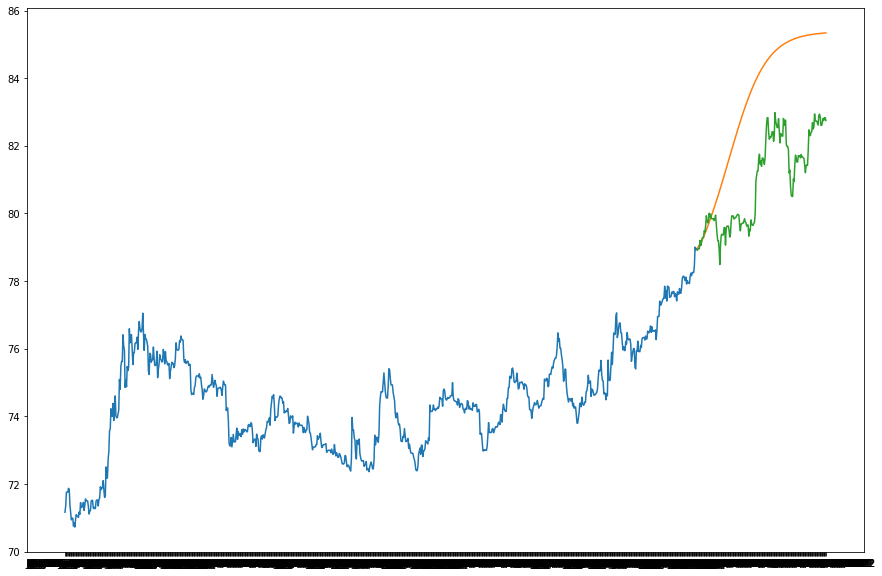

In [35]:
plt.figure(figsize=(15,10))
plt.plot(df["Date"],df["1_USD="])

plt.plot(df2["Date"],scaler.inverse_transform(lst_output))

plt.plot(df2["Date"],df2["Price"])

In [36]:
model.save_weights("model.h5")

In [37]:
from tensorflow.keras.utils import plot_model

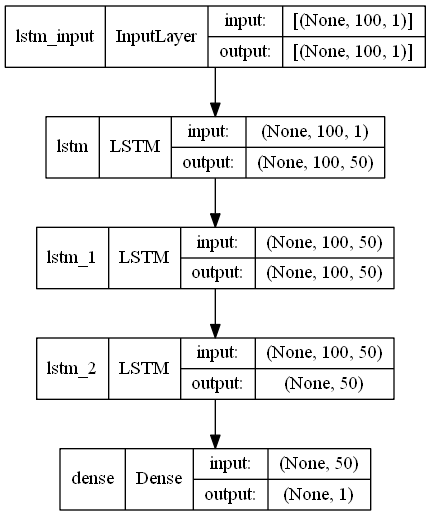

In [38]:
plot_model(model,to_file='my_model.png',show_shapes=True)

ValueError: ANN Visualizer: Layer not supported for visualizing